# Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [2]:
df_full = pd.read_csv("air_canada_reviews.csv")
df_reviews = pd.read_csv("sentiment_analysis.csv")

In [3]:
df_full.head()

,Unnamed: 0,Date,Overall,Reviewer Info,Review,Rating
0,0,23rd January 2025,"""no help or options given""",R Heale (Australia) 23rd January 2025,"Delayed hours, boarded the plane and then wait...",1
1,1,21st January 2025,"""always had a good experience""",T Chrones (Canada) 21st January 2025,Not Verified | Have flown with Air Canada man...,10
2,2,17th January 2025,“Now they are refusing to give the refund!”,Cinimol Nair (Canada) 17th January 2025,I booked a bulkhead seat online so that I coul...,1
3,3,16th January 2025,"""experience at check-in one of the worst""\r",M Erinaj (Canada) 16th January 2025,My husband and I had an extremely distressing ...,1
4,4,16th January 2025,“What I can truly call a win win”,Paul Tyrrell (Ireland) 16th January 2025,I flew with them last August. There was a prob...,10


In [4]:
df_reviews.head()

,Unnamed: 0,Review
0,0,"Delayed hours, boarded the plane and then wait..."
1,1,Not Verified | Have flown with Air Canada man...
2,2,I booked a bulkhead seat online so that I coul...
3,3,My husband and I had an extremely distressing ...
4,4,I flew with them last August. There was a prob...


In [5]:
def clean_date(date_str):
    """ Remove ordinal suffixes from date strings (st, nd, rd, th) """
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply cleaning before conversion
df_full["Date"] = df_full["Date"].astype(str).apply(clean_date)
df_full["Date"] = pd.to_datetime(df_full["Date"], format="%d %B %Y")

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     2000 non-null   int64         
 1   Date           2000 non-null   datetime64[ns]
 2   Overall        2000 non-null   object        
 3   Reviewer Info  2000 non-null   object        
 4   Review         2000 non-null   object        
 5   Rating         2000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 93.9+ KB


In [7]:
df_full.head()

,Unnamed: 0,Date,Overall,Reviewer Info,Review,Rating
0,0,2025-01-23,"""no help or options given""",R Heale (Australia) 23rd January 2025,"Delayed hours, boarded the plane and then wait...",1
1,1,2025-01-21,"""always had a good experience""",T Chrones (Canada) 21st January 2025,Not Verified | Have flown with Air Canada man...,10
2,2,2025-01-17,“Now they are refusing to give the refund!”,Cinimol Nair (Canada) 17th January 2025,I booked a bulkhead seat online so that I coul...,1
3,3,2025-01-16,"""experience at check-in one of the worst""\r",M Erinaj (Canada) 16th January 2025,My husband and I had an extremely distressing ...,1
4,4,2025-01-16,“What I can truly call a win win”,Paul Tyrrell (Ireland) 16th January 2025,I flew with them last August. There was a prob...,10


In [8]:
Averager_rating = df_full["Rating"].mean()
print(f"⭐ Average Rating: {round(Averager_rating, 2)} / 10")

⭐ Average Rating: 3.34 / 10


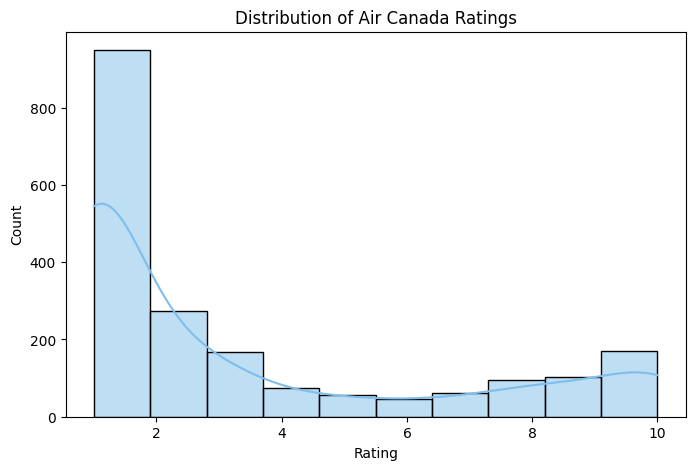

In [9]:
# Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_full["Rating"], bins=10, kde=True, color="#7fbeeb")
plt.title("Distribution of Air Canada Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_11353/3519036857.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_full.resample("M")["Rating"].mean().plot(marker="o", figsize=(10,5), title="Average Rating Over Time")


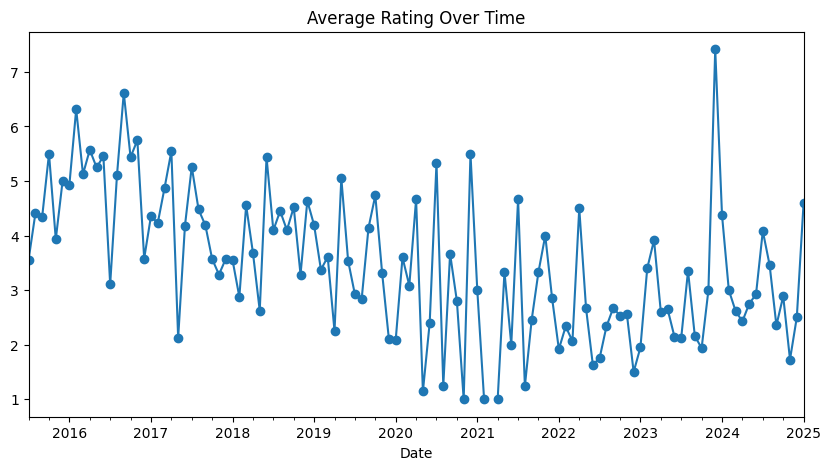

In [10]:
#Analyze Trends Over Time
df_full.set_index("Date", inplace=True)
df_full.resample("M")["Rating"].mean().plot(marker="o", figsize=(10,5), title="Average Rating Over Time")
plt.show()

In [11]:
df_reviews.head()

,Unnamed: 0,Review
0,0,"Delayed hours, boarded the plane and then wait..."
1,1,Not Verified | Have flown with Air Canada man...
2,2,I booked a bulkhead seat online so that I coul...
3,3,My husband and I had an extremely distressing ...
4,4,I flew with them last August. There was a prob...


# Using VADER for sentiment analysis

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [13]:
nltk.download("vader_lexicon")
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/minhnguyetnguyen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# VADER assigns positive, neutral, or negative sentiment scores
df_reviews["Sentiment_Score"] = df_reviews["Review"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify Sentiments
df_reviews["Sentiment_Label"] = df_reviews["Sentiment_Score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)
df_reviews.head()

,Unnamed: 0,Review,Sentiment_Score,Sentiment_Label
0,0,"Delayed hours, boarded the plane and then wait...",-0.9393,Negative
1,1,Not Verified | Have flown with Air Canada man...,0.7351,Positive
2,2,I booked a bulkhead seat online so that I coul...,-0.9829,Negative
3,3,My husband and I had an extremely distressing ...,-0.7599,Negative
4,4,I flew with them last August. There was a prob...,0.9814,Positive


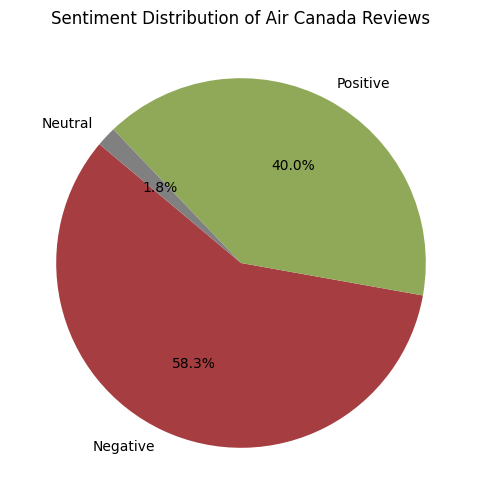

In [15]:
sentiment_counts = df_reviews["Sentiment_Label"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#a63d40', '#90a959', 'gray'])
plt.title("Sentiment Distribution of Air Canada Reviews")
plt.show()

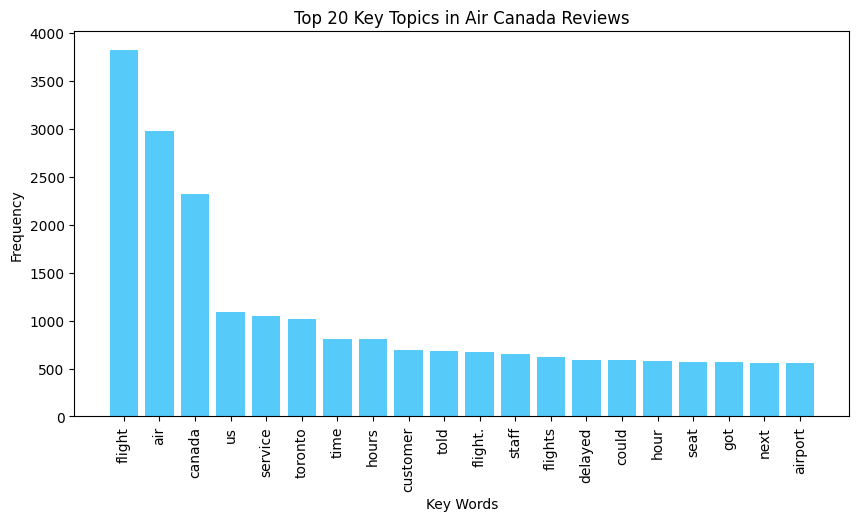

In [16]:
from collections import Counter
try:
    stopwords = set(nltk.corpus.stopwords.words("english"))
except LookupError:
    nltk.download("stopwords")
    stopwords = set(nltk.corpus.stopwords.words("english"))
    
# Extract reviews as text
reviews = df_reviews["Review"].astype(str)

# Convert reviews into a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Remove common stopwords
filtered_words = [
    word.lower()
    for word in words
    if word.lower() not in stopwords and word not in ["I", "The", "would", "one", "get", "-"]
]

# Get the top 20 most frequent words
word_counts = Counter(filtered_words)
top_20_words = word_counts.most_common(20)

# Unpack labels and values for visualization
labels, values = zip(*top_20_words)

# Create frequency bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color="#56cbf9")
plt.xticks(rotation=90)
plt.xlabel("Key Words")
plt.ylabel("Frequency")
plt.title("Top 20 Key Topics in Air Canada Reviews")
plt.show()

The most frequently mentioned topics in Air Canada reviews revolve around flights, delays, customer service, staff => common concerns and experiences among passengers.

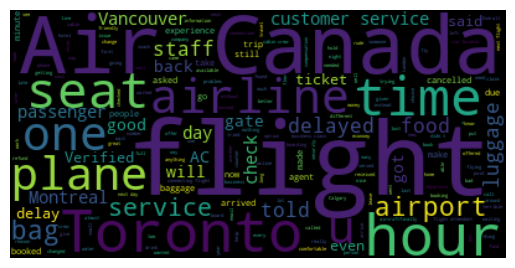

In [17]:
# Import the necessary libraries
from wordcloud import WordCloud

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(df_reviews['Review']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

# Performing Sentiment Analysis with BERT

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

/Users/minhnguyetnguyen/Documents/project/air_canada/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Load pre-trained BERT model for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [20]:
import torch.nn.functional as F

def get_sentiment(review_text):
    """Predicts sentiment score (1-5) using BERT model."""
    inputs = tokenizer(review_text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    scores = F.softmax(outputs.logits, dim=-1)
    sentiment_score = torch.argmax(scores) + 1  # Convert index to rating (1-5)
    return sentiment_score.item()

In [21]:
df_reviews["BERT_Sentiment"] = df_reviews["Review"].astype(str).apply(get_sentiment)
df_reviews.head()

,Unnamed: 0,Review,Sentiment_Score,Sentiment_Label,BERT_Sentiment
0,0,"Delayed hours, boarded the plane and then wait...",-0.9393,Negative,1
1,1,Not Verified | Have flown with Air Canada man...,0.7351,Positive,3
2,2,I booked a bulkhead seat online so that I coul...,-0.9829,Negative,1
3,3,My husband and I had an extremely distressing ...,-0.7599,Negative,1
4,4,I flew with them last August. There was a prob...,0.9814,Positive,5


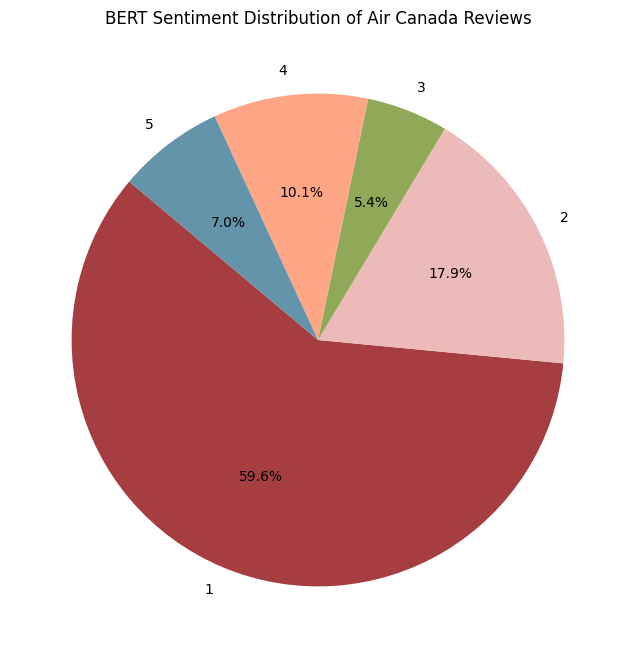

In [32]:
sentiment_counts = df_reviews["BERT_Sentiment"].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['#a63d40', '#ebbab9', '#90a959', '#ffa686', '#6494aa'])
plt.title("BERT Sentiment Distribution of Air Canada Reviews")
plt.show()

## Do Longer Reviews Tend to Be More Negative?

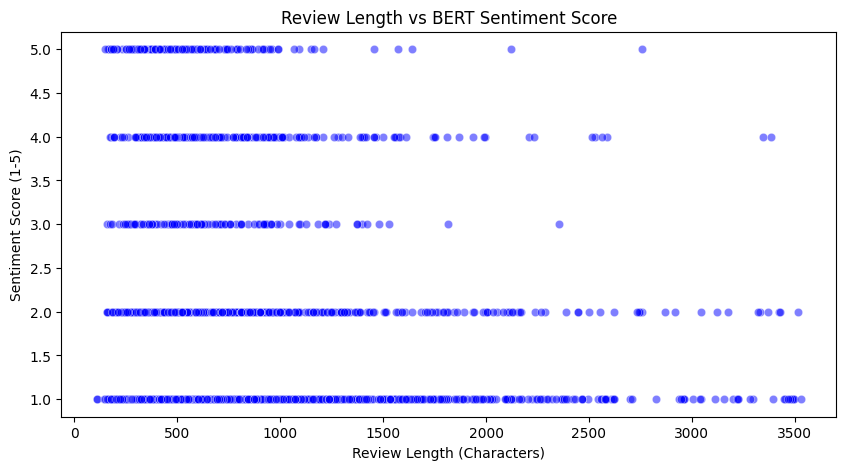

Correlation between Review Length and Sentiment Score: -0.10


In [23]:
df_reviews["BERT_Sentiment"] = pd.to_numeric(df_reviews["BERT_Sentiment"], errors="coerce")

# Compute review length in terms of characters
df_reviews["Review_Length"] = df_reviews["Review"].astype(str).apply(len)

# Analyze correlation between review length and sentiment
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reviews["Review_Length"], y=df_reviews["BERT_Sentiment"], alpha=0.5, color="blue")
plt.title("Review Length vs BERT Sentiment Score")
plt.xlabel("Review Length (Characters)")
plt.ylabel("Sentiment Score (1-5)")
plt.show()

# Compute correlation coefficient
correlation = df_reviews["Review_Length"].corr(df_reviews["BERT_Sentiment"])
print(f"Correlation between Review Length and Sentiment Score: {correlation:.2f}")

Many low-rated reviews (1-2 stars) tend to have longer character lengths (over 1000 characters).

Short and long reviews both contain positive ratings (4-5 stars)

# Analyze Sentiment Using Word-Based Metrics

In [24]:
negative_words = ["bad", "worst", "terrible", "awful", "horrible", "poor", "rude", "delay", "cancel", "problem", "lost", "unfriendly", "late"]

# Function to count negative words in a review
def count_negative_words(review):
    words = review.lower().split()
    return sum(1 for word in words if word in negative_words)

# Apply function to dataset
df_reviews["Negative_Word_Count"] = df_reviews["Review"].astype(str).apply(count_negative_words)

# Display results
df_reviews[["Review", "Negative_Word_Count"]].head()

,Review,Negative_Word_Count
0,"Delayed hours, boarded the plane and then wait...",1
1,Not Verified | Have flown with Air Canada man...,0
2,I booked a bulkhead seat online so that I coul...,1
3,My husband and I had an extremely distressing ...,2
4,I flew with them last August. There was a prob...,1


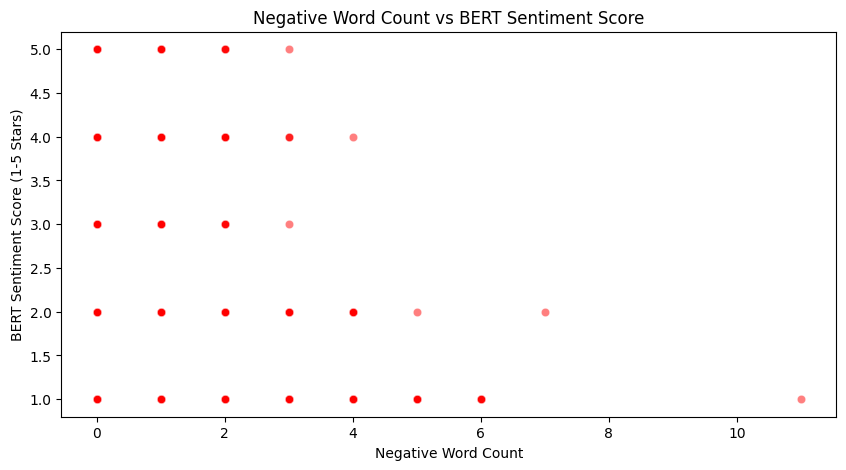

Correlation between Negative Word Count and BERT Sentiment Score: -0.29


In [25]:
# Scatter plot: Negative word count vs. BERT sentiment
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reviews["Negative_Word_Count"], y=df_reviews["BERT_Sentiment"], alpha=0.5, color="red")
plt.title("Negative Word Count vs BERT Sentiment Score")
plt.xlabel("Negative Word Count")
plt.ylabel("BERT Sentiment Score (1-5 Stars)")
plt.show()

# Compute correlation
correlation = df_reviews["Negative_Word_Count"].corr(df_reviews["BERT_Sentiment"])
print(f"Correlation between Negative Word Count and BERT Sentiment Score: {correlation:.2f}")

# Clustering Reviews Using Unsupervised Learning (Topic Modeling with LDA)

In [26]:
import spacy
from nltk.corpus import stopwords
import gensim
from gensim import corpora

In [27]:
# Load Spacy for text processing
nlp = spacy.load('en_core_web_sm')

nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
extra_words = {"i", "the", "would", "one", "get", "-"}

# Function to preprocess and clean text
def preprocess_text(text):
    """Tokenize, lemmatize, and remove stopwords from text."""
    doc = nlp(text)
    processed_text = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and token.lemma_.lower() not in stop_words and token.lemma_.lower() not in extra_words
    ]
    return processed_text

# Preprocess reviews
df_reviews['Processed_Review'] = df_reviews['Review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minhnguyetnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
dictionary = corpora.Dictionary(df_reviews['Processed_Review'])
corpus = [dictionary.doc2bow(text) for text in df_reviews['Processed_Review']]


In [29]:
from gensim.models import LdaModel

# Apply LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

Topic #0: 0.011*"business" + 0.009*"flight" + 0.009*"ac" + 0.008*"say" + 0.008*"class" + 0.008*"check" + 0.007*"seat" + 0.007*"canada" + 0.006*"air" + 0.005*"toronto"
Topic #1: 0.033*"flight" + 0.016*"hour" + 0.013*"canada" + 0.013*"luggage" + 0.013*"air" + 0.012*"bag" + 0.010*"tell" + 0.010*"day" + 0.010*"wait" + 0.009*"service"
Topic #2: 0.031*"canada" + 0.030*"air" + 0.029*"flight" + 0.013*"fly" + 0.012*"seat" + 0.010*"time" + 0.009*"airline" + 0.009*"ticket" + 0.008*"change" + 0.008*"book"
Topic #3: 0.055*"flight" + 0.020*"air" + 0.020*"canada" + 0.018*"hour" + 0.015*"toronto" + 0.013*"delay" + 0.011*"service" + 0.011*"time" + 0.009*"customer" + 0.008*"airport"
Topic #4: 0.024*"flight" + 0.019*"seat" + 0.017*"air" + 0.016*"canada" + 0.013*"service" + 0.011*"food" + 0.011*"good" + 0.009*"fly" + 0.009*"crew" + 0.009*"cabin"


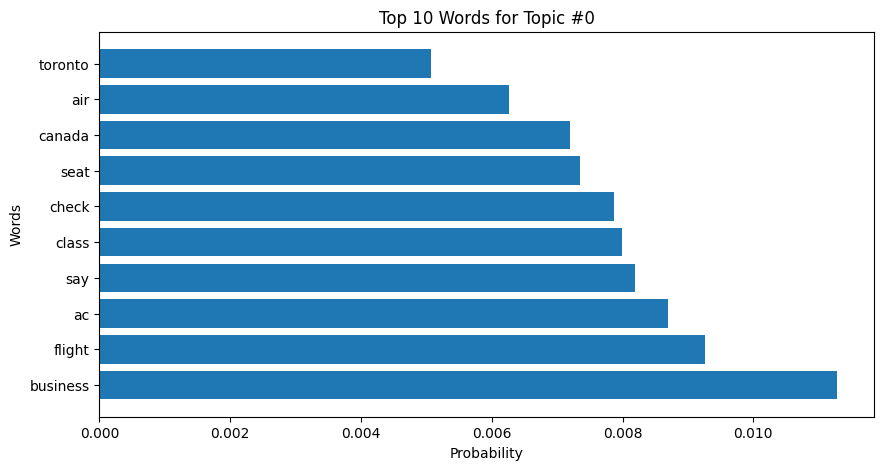

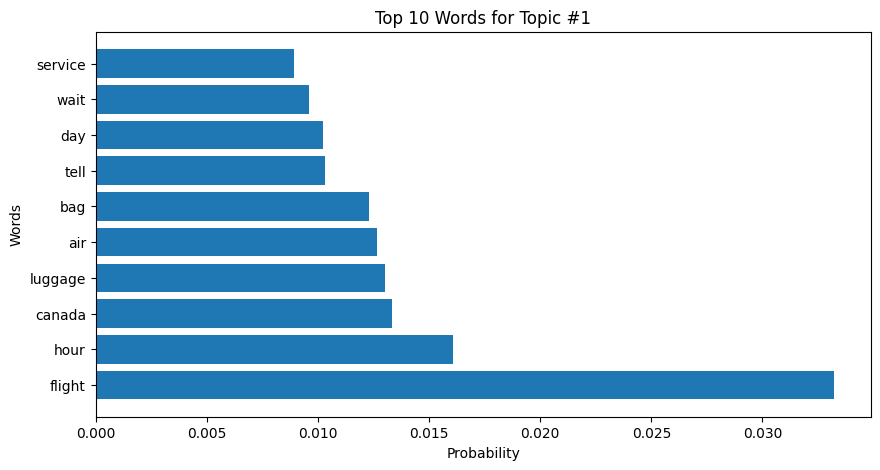

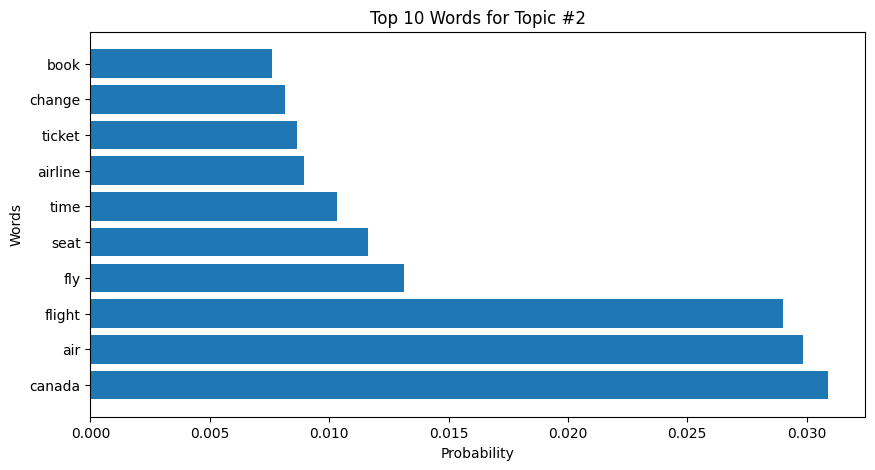

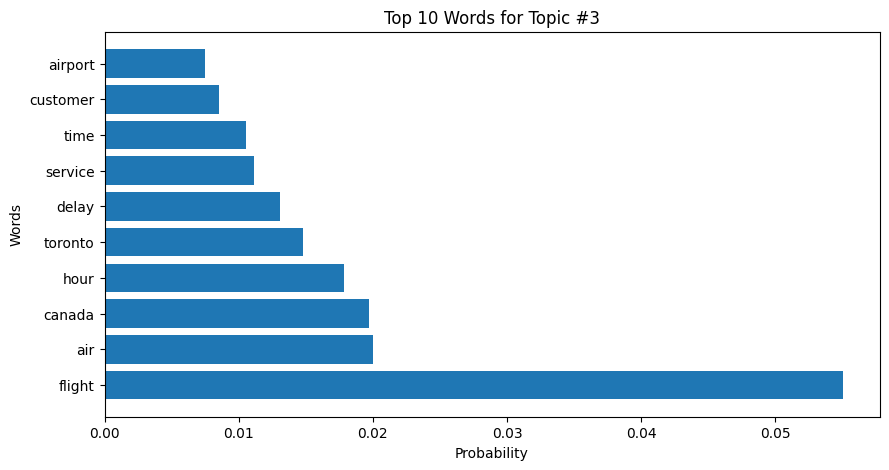

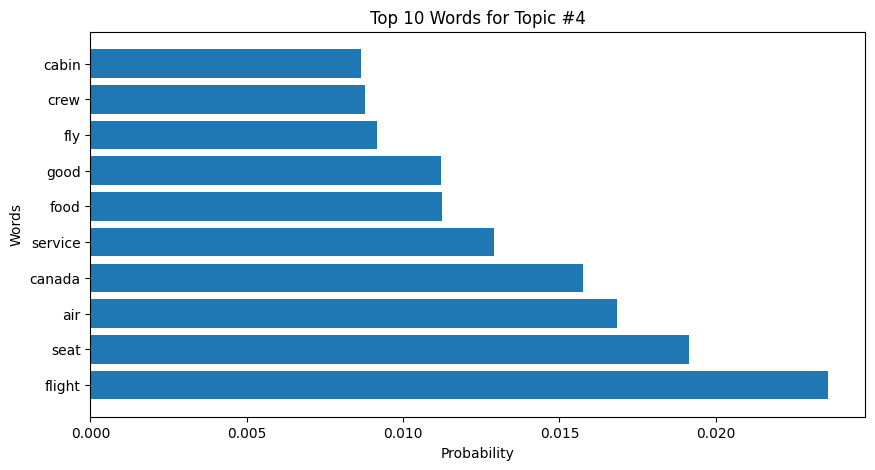

In [30]:
for i in range(5):
    plt.figure(figsize=(10, 5))
    wordcloud = lda_model.show_topic(i, topn=10)  # Top 10 words for the topic
    words, probs = zip(*wordcloud)
    plt.barh(words, probs)
    plt.title(f"Top 10 Words for Topic #{i}")
    plt.xlabel("Probability")
    plt.ylabel("Words")
    plt.show()